# __Back of the Battery Calculator__
---
# __1. Theoretical Capacties__


#### Copyright © Intercalation Ltd. All rights reserved.

<div>
<img src="images/fig_botb.png" width="800">
</div>

Welcome to the first installment! Today we'll work out how the theoretical capacity for a particular compound to store lithium ions is related to the molecular mass and the chemical formulation.



In [3]:
#Standard packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#Functions created for this sheet
from BotB_functions import fn_theoreticalcap as fn

---

### __Calculating theoretical capacity from a chemical formula__

The capacity of a battery material is the amount of charge (lithium ions) that can be stored by the material. The theoretical capacity for a particular compound is related to its molecular mass and chemical formulation, relative to the amount of lithium that moves in and out during charge and discharge.

## Faraday's Law to Calculate Capacity
Michael Faraday discovered in the 1800s that the amount of a substance deposited electrochemically by passing some amount of charge is directly related to the molecular mass of that substance. This remains the case for batteries where Li ions (or other metals) is shuttled between the cathode and anode materials.


This relationship is now known as Faraday's law, where the theoretical charge per mass or gravimetric capacity is given by:

<!-- $$ Q_\text{grav} = \frac{Q}{m} = \frac{nF}{M}$$ -->
$$ Q_\text{grav} =  \frac{nF}{M}\times\frac{1}{3600}\times 1000$$
where:
<!-- - $Q$ is the amount of charge (capacity)
- $m$ is the amount of mass -->
- $Q_\text{grav}$ is the gravimetric capacity [__mAh/g__]
- $n$ is the valence of the ion (1 for Li$^+$) 
- $M$ is the molecular mass of the material [__g/mol__]
- $F$ is Faraday's constant $F = 96485$ [__C/mol__] representing the charge in one mole of electrons

If we work with molar masses in the [__g__] units, and want $Q_\text{grav}$ in the "industry standard" units of milli amp-hours per gram [__mAh/g__], we must scale the units:
- $\times\frac{1}{3600}$ scales the coulombs in amp-seconds [__A*s__] to amp-hours [__A*h__]
- $\times 1000$ scales the amp-hours [__A*h__] to milli amp-hours [__mAh__]



---


# Lithium cobalt oxide example
Lets calculate some capacities, starting with lithium cobalt oxide! 
LiCoO2 follows this reaction during delithiation (de-intercalation):

$$\text{LiCoO}_2 \rightarrow \text{CoO}_2 + \text{Li}^+ + e^-$$

Following these steps, the code below shows that LiCoO2 has a specific capacity of 273.8 mAh/g
1. What are the molar masses of each element?
2. What is the molar mass of the entire lithiated material?
3. Apply Faraday's Law to calculate the theoretical capacity:



In [4]:
# 1. What are the molar masses of each element?
#----------------------------------------------------------------
Li = 6.941 #g
Co = 58.933 #g
O = 15.999 #g

# 2. What is the molar mass of the entire lithiated material?
#----------------------------------------------------------------
LCO = Li + Co + 2*O  #molecular mass of LiCoO2 (LCO)

# 3. Apply Faraday's Law to calculate the theoretical capacity:
#----------------------------------------------------------------
n = 1 #Lithium has a valence of +1
F = 96485 #C/mol

Q_grav = (n*F/LCO)*(1/3600)*1000 #Faradays law equation!

#Displaying answer
print('LiCoO2 theoretical gravimetric capacity: \n')
print(str(round(Q_grav,2)) + ' mAh/g')

LiCoO2 theoretical gravimetric capacity: 

273.84 mAh/g


## Try some other chemical formulae:
`theorycap` is a function that will convert a material formula into its theoretical capacity, try:

* LiCoO2
* LiFePO4
* Li(Ni0.8Mn0.1Co0.1)O2

In [8]:
compound = 'LiFePO4' #Options ["LiCoO2", "LiFePO4", "Li(Ni0.8Mn0.1Co0.1)O2"] {allow-input: true}
n = 1 #equivalence
Q_grav = fn.theorycap(compound,n)
Q_grav #mAh/g
print(str(round(Q_grav,2)) + ' mAh/g')

169.89 mAh/g


## Import some data on active materials

In [10]:
df = pd.read_csv('activesDB.csv')
df

,name,name_long,formula,type,cap,V,n,density,theorycap
0,NCA,lithium nickel cobalt aluminium oxide,Li(Ni0.8Co0.15Al0.05)O2,cathode,210,3.860,1,4.850,279
1,LCO,lithium cobalt oxide,LiCoO2,cathode,165,3.860,1,5.100,274
2,LFP,lithium iron phosphate,LiFePO4,cathode,160,3.375,1,3.600,170
3,NMC622,lithium nickel manganese colbalt oxide,Li(Ni0.6Mn0.2Co0.2)O2,cathode,181,3.860,1,4.700,277
4,NMC811,lithium nickel manganese colbalt oxide,Li(Ni0.8Mn0.1Co0.1)O2,cathode,195,3.860,1,4.700,276
5,LTO,lithium titanate,Ti5O12,anode,167,1.550,3,3.430,186
6,Gr,graphite,C6,anode,344,0.170,1,2.240,372
7,Li,lithium metal,Li,anode,3862,0.000,1,0.534,3861
8,Si,silicon,Si,anode,2200,0.400,4,2.300,3817


## Plot some theoretical capacities to make comparisons

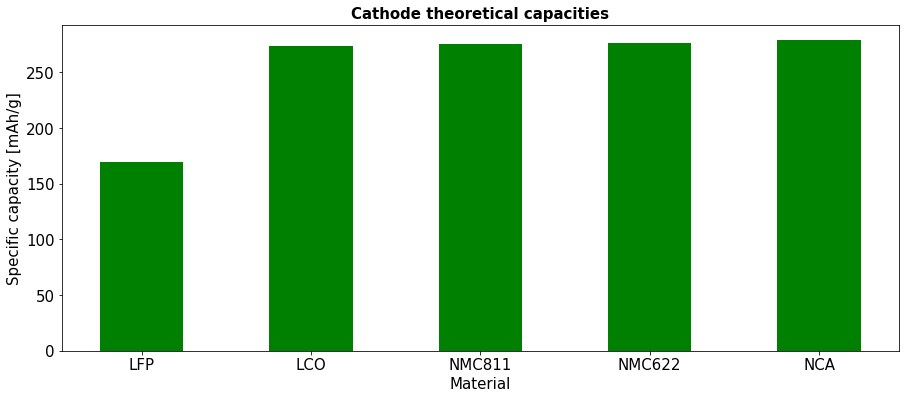

In [13]:
Material = 'cathode' #@param ["cathode", "anode"]
mat_list = df.index
theoretical_cap = []
for i in mat_list:
    n = df.loc[i].n
    compound = df.loc[i].formula
    cap = fn.theorycap(compound,n)
    theoretical_cap.append(cap)
    
df['theoretical_cap [mAh/g]'] = theoretical_cap
# df

# Query and Sort
df_material = df[df["type"]==Material]
df_material = df_material.sort_values(by=['theoretical_cap [mAh/g]'])
# df_material

mat_list = df_material.name
mat_cap = df_material["theoretical_cap [mAh/g]"]

#Plot on a bar chart
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.figure(figsize=(15,6))
x_pos = np.linspace(0,len(mat_list),len(mat_list))*1.3 #spacing on x axis
plt.bar(x_pos, mat_cap, color='green')
plt.xlabel("Material",fontsize=15)
plt.ylabel("Specific capacity [mAh/g]",fontsize=15)
title_string = string_in_string = "{} theoretical capacities".format(Material.title())
plt.title(title_string,fontsize=15,fontweight='bold')
plt.xticks(x_pos, mat_list,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# Conclusion

* In real life materials, not all of the lithium is extracted and so the true reversible capacity achievable is considerably lower. This is because cycling 100% of theoretical capacity causes severe degradation. For example, LCO (LiCoO2) practical capacities are around 165 mAh/g, or around 60% of the theoretical limit. We shall take this into consideration in future analyses. 

* We can also see why LFP is considered a lower capacity material than NMC. It also shows that the automotive trends of increasing the nickel content actually reduces the specific capacity (a little bit) but is done to improve rate capability and cycle stability.

* Next time, we'll look at the voltages that each material provides, which will allow us to compare the energy densities. 

**Please consider supporting Intercalation and BotB with a subscription. We'll work through some interesting case studies in the near future!**

[Subscribe Now!](https://intercalationstation.substack.com/publish/post/%%checkout_url%%)

